In [39]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [40]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [41]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [42]:
Base = automap_base()

In [43]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [44]:
# reflect an existing database into a new model
Base.prepare(autoload_with=engine)

# reflect the tables-- measurements 
data = engine.execute("SELECT * FROM measurement limit 1")
measurement_cols = list(data.keys())
measurement_cols

['id', 'station', 'date', 'prcp', 'tobs']

In [9]:
#station
data = engine.execute("SELECT * FROM station limit 1")
list(data.keys())

['id', 'station', 'name', 'latitude', 'longitude', 'elevation']

In [10]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
for row in session.query(Measurement.date).order_by(Measurement.date.desc()).first():
    recent_date = row
    print(recent_date)

2017-08-23


In [23]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 
recent_date

# Calculate the date one year from the last date in data set.
year_from = dt.date(2017, 8 ,23) - dt.timedelta(days = 365)
year_from

# Perform a query to retrieve the data and precipitation scores

one_year_data = session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date >= '2016-08-23').all()

one_year_data

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [24]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df_precip = pd.DataFrame.from_records(one_year_data, index='date', columns=['date', 'prcp'])
df_precip.head(10)

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
2016-08-29,0.00
2016-08-30,0.00
2016-08-31,0.13


In [25]:
# Sort the dataframe by date
df_precip = df_precip.sort_values(by='date', ascending = True)

Text(0, 0.5, 'Inches')

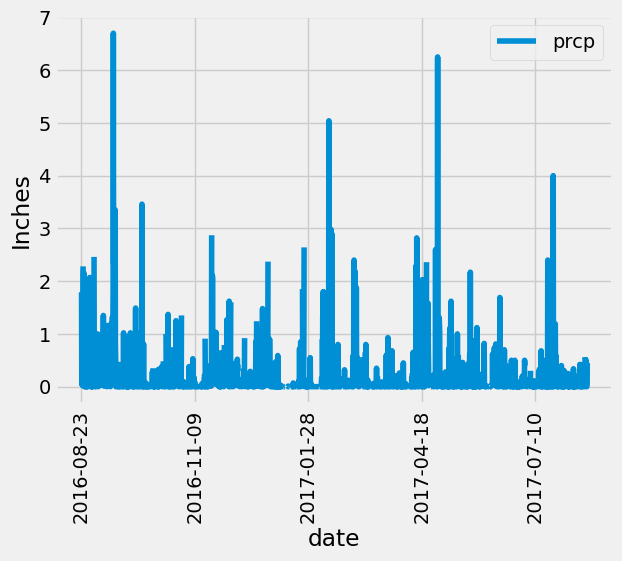

In [32]:
# Use Pandas Plotting with Matplotlib to plot the data
df_precip.plot(y = "prcp")
plt.xticks(rotation = 90)
plt.ylabel('Inches')

In [33]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_precip.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [46]:
# Design a query to calculate the total number stations in the dataset
number_stations = session.query(Station).count()
number_stations

9

In [47]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).\
    desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [48]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
max_temp = session.query(func.max(Measurement.prcp)).filter(Measurement.station > 'USC00519281').all()[0][0]
min_temp = session.query(func.min(Measurement.prcp)).filter(Measurement.station > 'USC00519281').all()[0][0]
avg_temp = session.query(func.avg(Measurement.prcp)).filter(Measurement.station > 'USC00519281').all()[0][0]
print(max_temp)
print(min_temp)
print(avg_temp)

6.38
0.0
0.08128210005706667


Text(0, 0.5, 'Frequency')

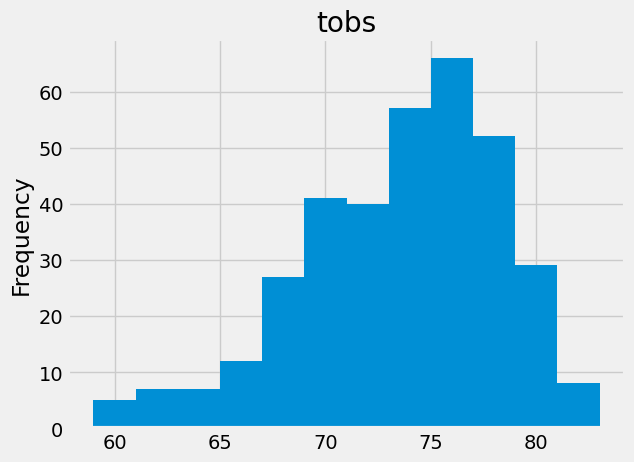

In [50]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
one_year_data_station = session.query(Measurement.date, Measurement.tobs).\
filter(Measurement.station == 'USC00519281').filter(Measurement.date > '2016-08-23').all()

df_precip_station = pd.DataFrame.from_records(one_year_data_station, index='date', columns=['date', 'tobs'])
df_precip_station.head(10)

# Use Pandas Plotting with Matplotlib to plot the data
df_precip_station.hist('tobs', bins = 12)
plt.ylabel('Frequency')

# Close session

In [51]:
# Close Session
session.close()